<a href="https://colab.research.google.com/github/GangDu/ML-Study-Jam/blob/master/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf

In [ ]:
X = tf.constant([2013, 2014, 2015, 2016, 2017])
Y = tf.constant([12000, 14000, 15000, 16500, 17500])

dataset = tf.data.Dataset.from_tensor_slices((X, Y))

for x, y in dataset:
    print(x.numpy(), y.numpy())

2013 12000
2014 14000
2015 15000
2016 16500
2017 17500


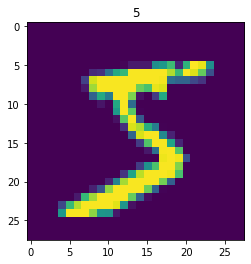

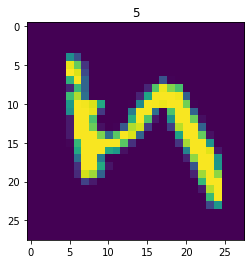

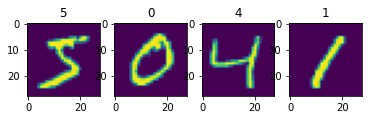

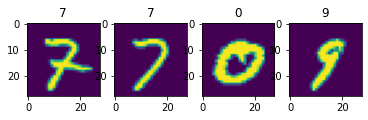

In [ ]:
import matplotlib.pyplot as plt

(train_data, train_label), (_, _) = tf.keras.datasets.mnist.load_data()
train_data = np.expand_dims(train_data.astype(np.float32) / 255.0, axis=-1)
mnist_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_label))

for image, label in mnist_dataset:
    plt.title(label.numpy())
    plt.imshow(image.numpy()[:, :, 0])
    plt.show()
    break

def rot90(image, label):
    image = tf.image.rot90(image)
    return image, label

mnist_dataset_rot90 = mnist_dataset.map(rot90)

for image, label in mnist_dataset_rot90:
    plt.title(label.numpy())
    plt.imshow(image.numpy()[:, :, 0])
    plt.show()
    break

mnist_dataset_batch = mnist_dataset.batch(4)

for images, labels in mnist_dataset_batch:
    fig, axs = plt.subplots(1, 4)
    for i in range(4):
        axs[i].set_title(labels.numpy()[i])
        axs[i].imshow(images.numpy()[i, :, :, 0])
    plt.show()
    break

mnist_dataset_shuffle = mnist_dataset.shuffle(buffer_size=10000).batch(4)

for images, labels in mnist_dataset_shuffle:
    fig, axs = plt.subplots(1, 4)
    for i in range(4):
        axs[i].set_title(labels.numpy()[i])
        axs[i].imshow(images.numpy()[i, :, :, 0])
    plt.show()
    break

In [ ]:
@tf.function
def f(x):
    print("The function is running in python")
    tf.print(x)

a = tf.constant(1, dtype=tf.int32)
f(a)
b = tf.constant(2, dtype=tf.int32)
f(b)
b_ = np.array(2, dtype=np.int32)
f(b_)
c = tf.constant(0.1, dtype=tf.float32)
f(c)
d = tf.constant(0.2, dtype=tf.float32)
f(d)
f(1)
f(2)
f(1)
f(0.1)
f(0.2)
f(0.1)

The function is running in python
1
2
2
The function is running in python
0.1
0.2
The function is running in python
1
The function is running in python
2
1
The function is running in python
0.1
The function is running in python
0.2
0.1


In [ ]:
a = tf.Variable(0.0)

@tf.function
def g():
    a.assign(a + 1.0)
    return a

print(g())
print(g())

tf.Tensor(1.0, shape=(), dtype=float32)
tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
@tf.function
def square_if_positive(x):
    if x > 0:
        x = x * x
    else:
        x = 0
    return x

a = tf.constant(1)
b = tf.constant(-1)
print(square_if_positive(a), square_if_positive(b))
print(tf.autograph.to_code(square_if_positive.python_function))

tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(0, shape=(), dtype=int32)
def tf__square_if_positive(x):
    with ag__.FunctionScope('square_if_positive', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:
        do_return = False
        retval_ = ag__.UndefinedReturnValue()

        def get_state():
            return (x,)

        def set_state(vars_):
            nonlocal x
            (x,) = vars_

        def if_body():
            nonlocal x
            x = (ag__.ld(x) * ag__.ld(x))

        def else_body():
            nonlocal x
            x = 0
        ag__.if_stmt((ag__.ld(x) > 0), if_body, else_body, get_state, set_state, ('x',), 1)
        try:
            do_return = True
            retval_ = ag__.ld(x)
        except:
            do_return = False
            raise
        return fscope.ret(retval_, do_return)



In [ ]:
@tf.function
def array_write_and_read():
    arr = tf.TensorArray(dtype=tf.float32, size=3)
    arr = arr.write(0, tf.constant(0.0))
    arr = arr.write(1, tf.constant(1.0))
    arr = arr.write(2, tf.constant(2.0))
    arr_0 = arr.read(0)
    arr_1 = arr.read(1)
    arr_2 = arr.read(2)
    return arr_0, arr_1, arr_2

a, b, c = array_write_and_read()
print(a, b, c)

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(2.0, shape=(), dtype=float32)


In [ ]:
!curl https://raw.githubusercontent.com/keras-team/keras/master/examples/mnist_cnn.py

'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img